In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.kernel_ridge import KernelRidge

plt.rcParams['figure.figsize'] = [12, 4]

In [2]:
# boston = datasets.load_boston()

In [3]:
# Load dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
boston = {'data': data, 'target': target}

In [4]:
print(boston['data'].shape)
print(boston['target'].shape)

(506, 13)
(506,)


Text(0.5, 1.0, 'House prices as a function of avg neighborhood education level')

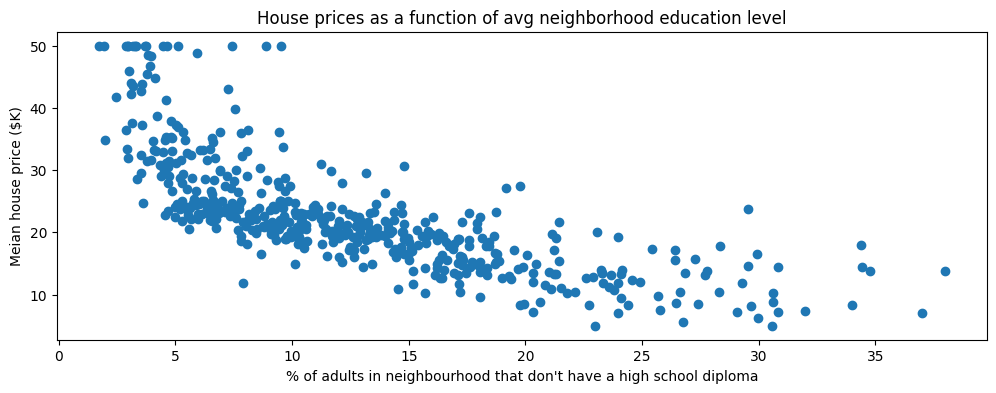

In [5]:
plt.scatter(boston['data'][:, 12], boston['target'])
plt.ylabel("Meian house price ($K)")
plt.xlabel("% of adults in neighbourhood that don't have a high school diploma")
plt.title("House prices as a function of avg neighborhood education level")

Text(0.5, 1.0, 'House prices as a function of avg neighborhood education level')

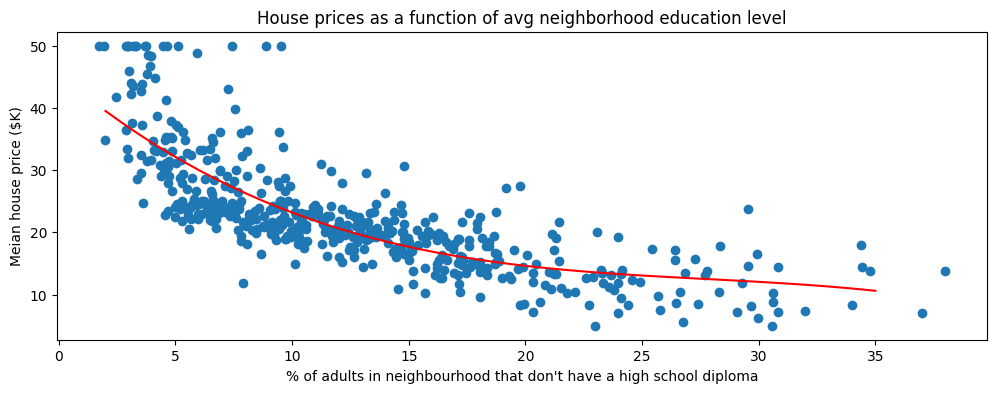

In [6]:
# Apply supervised ML algo
model = KernelRidge(alpha=1, kernel='poly')
model.fit(boston['data'][:,[12]], boston['target'].flatten())
predictions = model.predict(np.linspace(2, 35)[:, np.newaxis])

# visualise the results
plt.scatter(boston['data'][:, 12], boston['target'])
plt.plot(np.linspace(2, 35), predictions, c='red')
plt.ylabel("Meian house price ($K)")
plt.xlabel("% of adults in neighbourhood that don't have a high school diploma")
plt.title("House prices as a function of avg neighborhood education level")